In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


<AxesSubplot:>

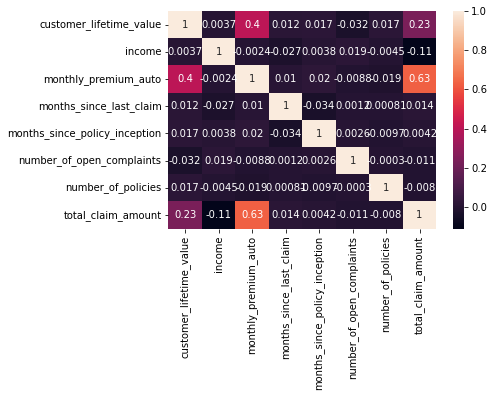

In [3]:
numbers = ["int64", ]
numericals = df.select_dtypes(include=numbers)
sns.heatmap(numericals.corr(), annot=True)

In [4]:
categories = ["object"]
categoricals = df.select_dtypes(include=categories)
categoricals.drop(["effective_to_date"], axis=1, inplace=True)

In [5]:
label_features = ["coverage", "education", "vehicle_class"]
label_cat = categoricals[label_features]

In [6]:
categoricals.drop(label_features, axis=1, inplace = True)


In [7]:
label_cat

,coverage,education,vehicle_class
0,basic,college,four-door car
1,basic,college,four-door car
2,basic,bachelor,suv
3,extended,college,four-door car
4,premium,bachelor,four-door car
...,...,...,...
10684,premium,bachelor,luxury car
10685,basic,college,four-door car
10686,extended,bachelor,luxury suv
10687,premium,college,suv


In [8]:
encoder = OneHotEncoder()
hotcateg = encoder.fit_transform(categoricals).toarray()
hot_df = pd.DataFrame(hotcateg)
hot_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10685,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10687,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
labencoder = LabelEncoder()
hotcateg_cov = labencoder.fit_transform(label_cat["coverage"])
hotcateg_edu = labencoder.fit_transform(label_cat["education"])
hotcateg_vs = labencoder.fit_transform(label_cat["vehicle_class"])
uni_df= np.stack([hotcateg_cov, hotcateg_edu, hotcateg_vs], axis=1)
labeled_df = pd.DataFrame(uni_df, columns=["coverage","education", "vehicle_class"])
labeled_df

,coverage,education,vehicle_class
0,0,1,0
1,0,1,0
2,0,0,4
3,1,1,0
4,2,0,0
...,...,...,...
10684,2,0,1
10685,0,1,0
10686,1,0,2
10687,2,1,4


In [10]:
cat_dumms = pd.get_dummies(categoricals)
cat_dumms

,region_central,region_east,region_north west,region_west region,response_no,response_yes,month_feb,month_jan,employment_status_disabled,employment_status_employed,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
10685,0,0,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
10686,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
10687,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [11]:
#new_cat_df = cat_dumms.join(labeled_df)
#numericals = numericals.join(new_cat_df)

In [12]:
#low_coef_feauteres = ["number_of_open_complaints","number_of_policies", "months_since_policy_inception","education", "months_since_last_claim"]
#numericals.drop(low_coef_feauteres, axis=1,inplace = True)

In [13]:
pwr = PowerTransformer()
ltv = numericals["customer_lifetime_value"]
ltv_array = ltv.to_numpy()
ltv_array= np.reshape(ltv_array,(-1, 1))
ltv = pwr.fit_transform(ltv_array)
numericals["customer_lifetime_value"] = ltv


In [14]:
stscl = StandardScaler()
mpa = numericals["total_claim_amount"]
mpa_array = mpa.to_numpy()
mpa_array= np.reshape(mpa_array,(-1, 1))
mpa = pwr.fit_transform(mpa_array)
numericals["total_claim_amount"] = mpa
#numericals.hist(figsize=(14,14))

In [15]:
#splitting the target feature
X = numericals.drop("monthly_premium_auto", axis=1)
y = numericals["monthly_premium_auto"]

In [16]:
#splitting the testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=123)

In [17]:
std_scl = StandardScaler()
X_trained_tr = std_scl.fit_transform(X_train)
X_test_tr = std_scl.fit_transform(X_test)

In [18]:
X_test_tr = std_scl.fit_transform(X_test)


In [19]:
###statsmodels.api model
#train
X_trained_tr_cons = sm.add_constant(X_trained_tr)
model = sm.OLS(y_train, X_trained_tr_cons).fit()
predict_train = model.predict(X_trained_tr_cons)

#test
X_test_tr_cons = sm.add_constant(X_test_tr)
model = sm.OLS(y_test, X_test_tr_cons).fit()
predict_test = model.predict(X_test_tr_cons)

In [20]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     monthly_premium_auto   R-squared:                       0.425
Model:                              OLS   Adj. R-squared:                  0.423
Method:                   Least Squares   F-statistic:                     281.2
Date:                  Thu, 10 Nov 2022   Prob (F-statistic):          2.01e-314
Time:                          09:39:16   Log-Likelihood:                -12470.
No. Observations:                  2673   AIC:                         2.496e+04
Df Residuals:                      2665   BIC:                         2.500e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5159      0.498

In [21]:
###Scikit model
sk_model = LinearRegression()
sk_model.fit(X_trained_tr, y_train)

LinearRegression()

In [22]:
X_train

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
9424,0.395674,87473,28,7,0,8,0.229423
7226,-0.397519,12261,26,80,0,1,0.701189
8017,-0.508457,58842,6,74,0,1,0.486788
6911,0.395283,64801,23,19,0,2,-0.458610
10569,-0.593015,11689,7,46,0,1,0.586868
...,...,...,...,...,...,...,...
9785,-1.168859,73938,34,48,0,1,-1.800901
7763,-0.061615,78834,14,20,2,8,-0.141094
5218,-1.669782,23033,5,9,0,1,0.399233
1346,1.787158,76358,25,3,0,2,-1.501135


In [23]:
sk_model.coef_

array([12.69704531,  1.99078842,  0.18086387,  0.45822296,  0.33367187,
       -3.64960835, 15.98254614])

In [24]:
sk_model.rsquar_

AttributeError: 'LinearRegression' object has no attribute 'rsquar_'

In [ ]:
y_pred_test = sk_model.predict(X_test_tr)
y_pred_train = sk_model.predict(X_trained_tr)

In [ ]:
print(f'model score on training data: {sk_model.score(X_train, y_train)}')
print(f'model score on testing data: {sk_model.score(X_test, y_test)}')

In [ ]:
coefs = pd.DataFrame(
   sk_model.coef_,
   columns=['Coefficients'], index=X_train.columns)

In [ ]:
print(coefs)